In [4]:
!pip install scikit-plot

In [5]:
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import defaultdict

#libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import scikitplot as skplt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_excel("Telecom_Churn.xls")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [8]:
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [9]:
data.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [10]:
#I'll drop the Phone number, because it doesn't contain important information for us, and have too many unique values
data.drop("Phone", axis=1, inplace=True)

# 1. Perform the actions from Homework 3 (missing values, duplicates etc.) to make data ready for modeling.

In [11]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


# 2. Develop a decision tree model which estimates the probability of churn as correctly as possible (you may tune hyperparameters such as tree depth).

In [12]:
#making dummes,train test split
data=pd.get_dummies(data, drop_first=True)

In [13]:
#separating X and Y
Y=data["Churn"]
X=data.drop("Churn",axis=1)

In [14]:
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [15]:
#building the model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X0,Y0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [16]:
Y0_dt=dt.predict_proba(X0)[:,1]
Y1_dt=dt.predict_proba(X1)[:,1]

In [17]:
#calculating roc auc score( with probabilities, which is better)
print("ROC_AUC Train for Fully grown DT:",roc_auc_score(Y0,Y0_dt).round(2))
print("ROC_AUC Test for Fully grown DT:",roc_auc_score(Y1,Y1_dt).round(2))

ROC_AUC Train for Fully grown DT: 1.0
ROC_AUC Test for Fully grown DT: 0.84


On the fully grown DT we got 1 and 0.84 ROC AUC scores on train and test sets, respectively. This means that our model has overfitting. Therefore, the next step would be hyperparameter tuning( firstly with manually setting up max_depth and min_samples_leaf, then with GridSearch)


In [18]:
#setting 2 hyperparameter values manually
dt1=DecisionTreeClassifier(random_state=42, max_depth=28,min_samples_leaf=150).fit(X0,Y0)

In [19]:
#calculating probabilities
Y0_dt1=dt1.predict_proba(X0)[:,1]
Y1_dt1=dt1.predict_proba(X1)[:,1]

In [20]:
print("ROC_AUC Train for Manually Tuned DT:",roc_auc_score(Y0,Y0_dt1).round(2))
print("ROC_AUC Test for Manually Tuned DT:",roc_auc_score(Y1,Y1_dt1).round(2))

ROC_AUC Train for Manually Tuned DT: 0.88
ROC_AUC Test for Manually Tuned DT: 0.87


In [21]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(3,33),"min_samples_leaf":range(10,200,10),
          "class_weight":["balanced", None]}

In [22]:
#Cross-Validated Gridsearch using parameters 
gs_dt=GridSearchCV(estimator=dt,param_grid=param_dt,scoring="roc_auc",cv=5)

In [23]:
gs_dt.fit(X0,Y0)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 33), 'min_samples_leaf': range(10, 200, 10), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
#Optimal parameters
gs_dt.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 30}

In [25]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight=None,max_depth=5,
                             min_samples_leaf=30, random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [26]:
#calculating roc auc score 
print("ROC_AUC Train for Tuned DT:",roc_auc_score(Y0,Y0_dt_grid).round(2))
print("ROC_AUC Test for Tuned DT:",roc_auc_score(Y1,Y1_dt_grid).round(2))

ROC_AUC Train for Tuned DT: 0.91
ROC_AUC Test for Tuned DT: 0.92


In [27]:
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

Mean 5-fold ROC AUC score for DT Tuned hyperparameters: 0.9


In [28]:
#Scaling
sc=StandardScaler()
X0_sc=pd.DataFrame(sc.fit_transform(X0), columns=X0.columns.tolist())
X1_sc=pd.DataFrame(sc.fit_transform(X1), columns=X1.columns.tolist())

In [29]:
#DT on scaled data
#setting up the ranges
dt_sc=DecisionTreeClassifier(random_state=42)
param_dt_sc={"max_depth":range(3,33),"min_samples_leaf":range(10,200,10),
          "class_weight":["balanced", None]}
gs_dt_scaled=GridSearchCV(estimator=dt_sc,param_grid=param_dt_sc,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X0_sc,Y0)

Fitting 5 folds for each of 1140 candidates, totalling 5700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5700 out of 5700 | elapsed:  3.8min finished


In [30]:
gs_dt_scaled.best_params_

{'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 30}

In [31]:
#fitting and priting the results
dt_scaled=DecisionTreeClassifier(max_depth=5, min_samples_leaf=30,class_weight=None, random_state=42).fit(X0_sc,Y0)


In [32]:
#getting probabilities
Y0_dt_sc=dt_scaled.predict_proba(X0_sc)[:,1]
Y1_dt_sc=dt_scaled.predict_proba(X1_sc)[:,1]

In [33]:
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_dt_sc).round(2))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_dt_sc).round(2))

ROC_AUC Train: 0.91
ROC_AUC Test: 0.91


In [34]:
print("Mean 5-fold ROC AUC score Scaled DT:",np.mean(cross_val_score(estimator=dt_scaled, X=sc.fit_transform(X),y=Y,cv=5, scoring="roc_auc")).round(2))

Mean 5-fold ROC AUC score Scaled DT: 0.9


# 3. Calculate Sensitivity, Specificity, ROC AUC and any other measure you find appropriate for evaluating model performance and choose winner model.

In [36]:
Y0_dt_sc1=np.where(Y0_dt_sc>=0.5,1,0)
Y1_dt_sc1=np.where(Y1_dt_sc>=0.5,1,0)

In [37]:
cm_train=confusion_matrix(Y0,Y0_dt_sc1).T

In [38]:
print("Accuracy_train:", (cm_train[0,0]+cm_train[1,1])/len(Y0))
print("Sensitivity_train:",cm_train[1,1]/(cm_train[1,1]+cm_train[1,0]))
print("Specificity_train:",cm_train[0,0]/(cm_train[0,0]+cm_train[0,1]))

Accuracy_train: 0.9423769507803121
Sensitivity_train: 0.8767605633802817
Specificity_train: 0.9507900677200903


In [39]:
cm_test=confusion_matrix(Y1,Y1_dt_sc1).T

In [40]:
print("Accuracy_test:", (cm_test[0,0]+cm_test[1,1])/len(Y1))
print("Sensitivity_test:",cm_test[1,1]/(cm_test[1,1]+cm_test[1,0]))
print("Specificity_test:",cm_test[0,0]/(cm_test[0,0]+cm_test[0,1]))

Accuracy_test: 0.9280575539568345
Sensitivity_test: 0.8282828282828283
Specificity_test: 0.9414965986394558


# Logistic regression based on non scaled and scaled data

In [41]:
#Hyperparameter tuning for Logistic Regression
logit=LogisticRegression(random_state=42)
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,50,20)}
gs_logit=GridSearchCV(estimator=logit,param_grid=param_logit,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X0,Y0)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   23.4s finished


In [42]:
gs_logit.best_params_

{'C': 7.894821052631578, 'class_weight': None}

In [43]:
#fitting logit with best params of gridsearch
logit_grid=LogisticRegression(C=7.894821052631578, class_weight=None,random_state=42).fit(X0,Y0)
#making predictions
Y0_logit=logit_grid.predict_proba(X0)[:,1]
Y1_logit=logit_grid.predict_proba(X1)[:,1]

In [44]:
#calculating roc auc score 
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit).round(2))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit).round(2))
print("Mean 5-fold ROC AUC score for LOGIT Tuned hyperparameters:",np.mean(cross_val_score(estimator=logit_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

ROC_AUC Train: 0.83
ROC_AUC Test: 0.83
Mean 5-fold ROC AUC score for LOGIT Tuned hyperparameters: 0.8


In [45]:
#GridSearching Logit on scaled data
logit_sc=LogisticRegression(random_state=42)
param_logit_sc={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,50,20)}
gs_logit_scaled=GridSearchCV(estimator=logit_sc,param_grid=param_logit_sc,
                        scoring="roc_auc",
                        cv=5,verbose=1).fit(X0_sc,Y0)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   17.2s finished


In [46]:
gs_logit.best_params_

{'C': 7.894821052631578, 'class_weight': None}

In [47]:
#building logit on scaled data using best params
logit_scaled=LogisticRegression(C=50, class_weight="balanced", random_state=42).fit(X0_sc,Y0)
#calculating roc auc score and mean CV score:because of not separately saving predicted probabilities we do as follows
print("ROC_AUC Train for Scaled logit:",roc_auc_score(Y0,gs_logit_scaled.predict_proba(X0_sc)[:,1]).round(2))
print("ROC_AUC Test for Scaled logit:",roc_auc_score(Y1,gs_logit_scaled.predict_proba(X1_sc)[:,1]).round(2))
print("Mean 5-fold ROC AUC score for Scaled LOGIT:",np.mean(cross_val_score(estimator=logit_scaled, X=sc.fit_transform(X),y=Y,cv=5, scoring="roc_auc").round(2)))

ROC_AUC Train for Scaled logit: 0.83
ROC_AUC Test for Scaled logit: 0.83
Mean 5-fold ROC AUC score for Scaled LOGIT: 0.8039999999999999


In [48]:
#RESULTS SUMMARY
#5-fold mean cross-validated score based on the whole data for all models
print("Mean 5-fold ROC AUC score for DT Tuned Not Scaled:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for DT Tuned Scaled:",np.mean(cross_val_score(estimator=dt_scaled, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for Logit Tuned Not Scaled:",np.mean(cross_val_score(estimator=logit_grid, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))
print("Mean 5-fold ROC AUC score for Logit Tuned Scaled:",np.mean(cross_val_score(estimator=logit_scaled, X=X,y=Y,cv=5, scoring="roc_auc")).round(2))

Mean 5-fold ROC AUC score for DT Tuned Not Scaled: 0.9
Mean 5-fold ROC AUC score for DT Tuned Scaled: 0.9
Mean 5-fold ROC AUC score for Logit Tuned Not Scaled: 0.8
Mean 5-fold ROC AUC score for Logit Tuned Scaled: 0.81


# Interpret the winner model (feature importances), is it better than the Logistic regression model?


In [63]:
#property returning feature importances as array
dt_scaled.feature_importances_

array([0.        , 0.06690674, 0.10984974, 0.10391989, 0.        ,
       0.        , 0.17319201, 0.10420364, 0.        , 0.00536408,
       0.19460634, 0.        , 0.01606844, 0.        , 0.00498418,
       0.12957099, 0.09133396, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [64]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head()

,Feature_imp
Day Charge,0.194606
CustServ Calls,0.173192
Intl Calls,0.129571
Day Mins,0.109850
Int'l Plan,0.104204


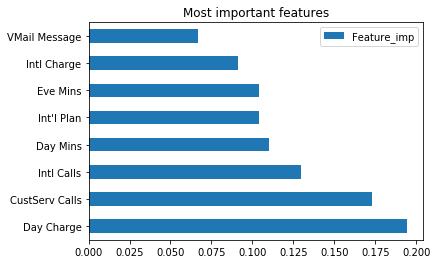

In [74]:
#visualizing feature importances
feat_imp.head(8).plot.barh()
plt.title("Most important features")
plt.show()

# Making ROC_AUC, Gain and Lift plots

In [67]:
#Summarizing the results based on CV score: CV for not scaled , tuned DT and Logit and scaled ones.
#To plot ROC curve, we should get TPR(sensitivity), FPR(1-Specificity) for different thresholds
FPR,TPR,thresholds=roc_curve(Y1,Y1_dt_sc)

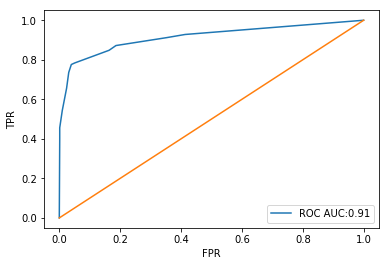

In [68]:
#ROC Curves for DT best model
#plotting ROC Curve
plt.plot(FPR,TPR,label=f"ROC AUC:{roc_auc_score(Y1,Y1_dt_sc).round(2)}")
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

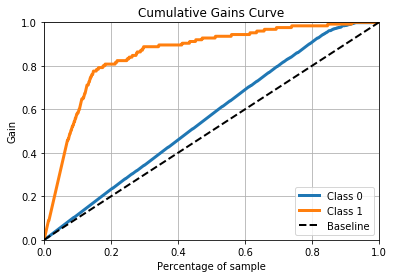

In [73]:
#Cummulative gain curve
skplt.metrics.plot_cumulative_gain(Y1,dt_scaled.predict_proba(X1_sc))
plt.show()

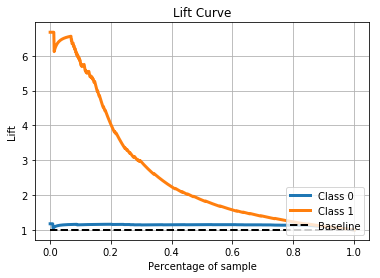

In [72]:
#lift curve
skplt.metrics.plot_lift_curve(Y1,dt_scaled.predict_proba(X1_sc))
plt.show()